In [1]:
from projection_fit import ProjectionFit
from matplotlib import pyplot as plt
import h5py
import numpy as np
import pprint
from image_processing import ImageProcessor
from gaussian_model import GaussianModel

In [2]:
def read_file(fname):
    with h5py.File(fname) as f:
        images = f["images"][:]
    return images

In [3]:
img_list= ['DYG14_1701969512.h5','DYG14_1701969514.h5','DYG14_1701969516.h5','DYG14_1701969518.h5',
           'DYG14_1701969528.h5','DYG14_1701969531.h5','DYG14_1701969533.h5','DYG14_1701969535.h5',
           'DYG14_1701969538.h5','DYG14_1701969541.h5','OTRS_LTUS_417_1692292260.h5','OTRS_IN20_621_1696886871.h5']
path = '/u/cd/cgarnier/beam_images/' + img_list[6]
print(img_list[6])
images = read_file(path)
raw_image = images[0,:,:]

DYG14_1701969533.h5


In [4]:
def get_projections(img):
    x_projection = np.array(np.sum(img,axis=0))
    y_projection = np.array(np.sum(img,axis=1))
    return x_projection, y_projection

In [5]:
x_proj, y_proj = get_projections(raw_image)

In [6]:
gauss_model = GaussianModel(x_proj)

setting distribution
192506.1934128527 0.38571428571428573 0.1 49219.19999999995
getting distribution
192506.1934128527 0.38571428571428573 0.1 49219.19999999995


In [7]:
gauss = GaussianModel()

In [8]:
projection_fit = ProjectionFit(distribution_data = x_proj, model = gauss)

setting distribution
0.6827700398542319 0.38571428571428573 0.1 0.1745678648038225
getting distribution
getting distribution
getting distribution


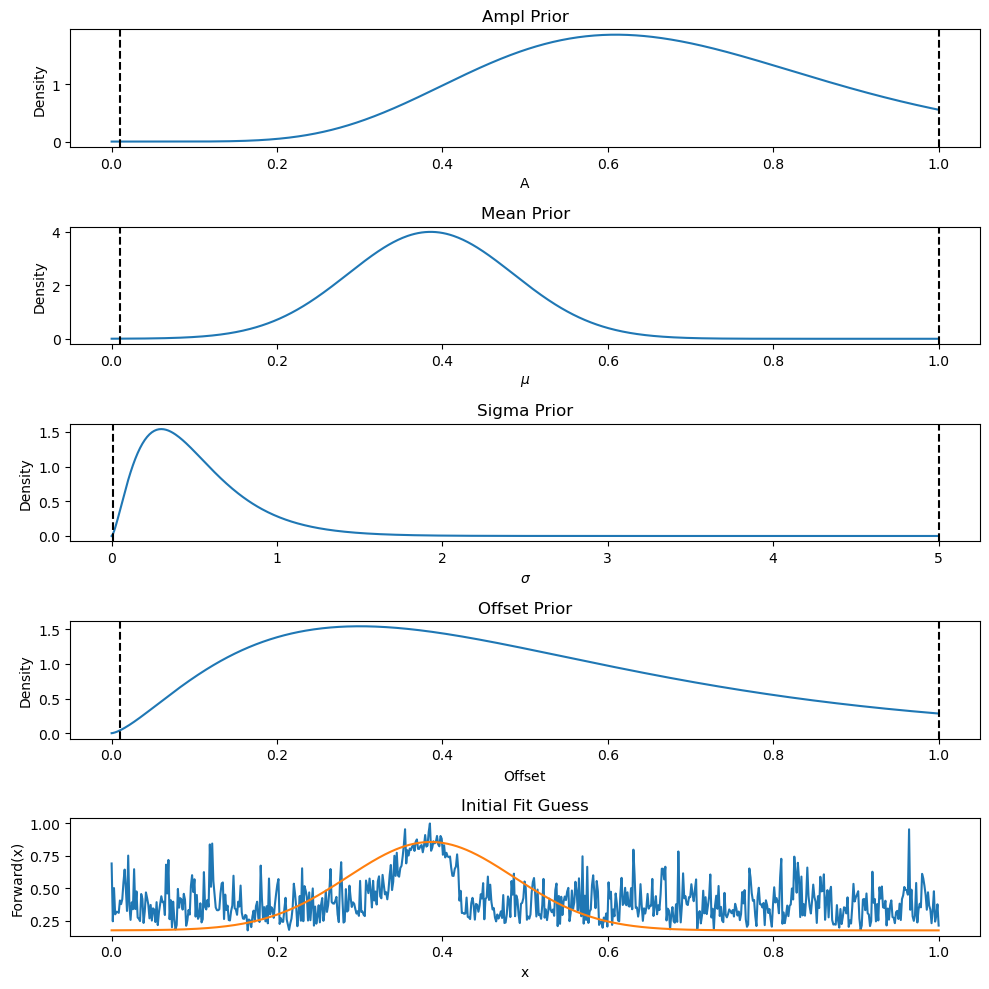

In [9]:
projection_fit.model_setup() #initialize()

getting distribution
getting distribution


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 10.375918659705947
        x: [ 5.311e-01  3.771e-01  3.015e-02  3.722e-01]
      nit: 18
      jac: [ 8.349e-06  7.834e-05 -7.674e-05  1.048e-05]
     nfev: 130
     njev: 26
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

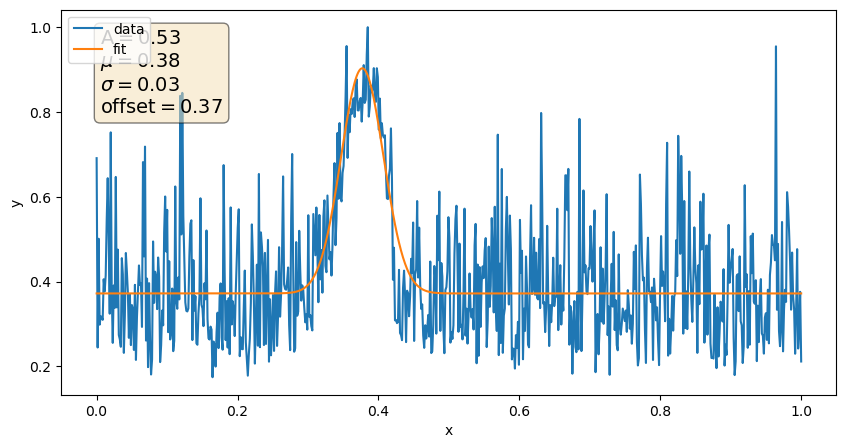

In [10]:
projection_fit.fit_model()